---
<style>
hr {
    border-width:2px;
    border-color:#75DFC1;
}
</style>
---

<center> <h1> Projet - Supply Chain </h1> </center>
<center> <h2> Étape : Data Visualisation </h2></center>

---

# Informations explicatives

## Catégorie ciblée : Services aux entreprises
## Sous catégorie ciblée : Transport et logistique


On récupère le DataFrame suivant :

1. `df_avis_Preprocessing.csv` contient les informations suivantes pour la sous-catégorie ciblée :
   - Nom de l'entreprise
   - Nom du client
   - Nombre d'avis du client
   - Pays
   - Trust score
   - Date de l'avis
   - Titre de l'avis
   - Contenu de l'avis
   - Réponse de l'entreprise (Non si inexistant)
   - Année
   - Mois
   - Jour de la semaine
   - Weekend (1 si weekend, 0 sinon)
   - Jour du mois
   - Heure
   - Emojis présents dans l'avis
   - Texte représentant l'emoji
   - Langue de l'avis
   - Emojis extraits

In [2]:
# importation des packages
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Affichage des 5 premières lignes du DataFrame
df = pd.read_csv("df_avis_Preprocessing1.csv")
df.head()

,Nom_Entreprise,Nom_Client,Nombre_avis,Pays,Note,Date,Titre_avis,Contenu_avis,Réponse_Entrpris,year,month,weekday,weekend,day,hour,emojis,emojis_text,Langue,extracted_emojis
0,2atps,agathe,1,FR,5,2023-12-08 10:45:35+00:00,personnel réactif !!!,personnel réactif !!!! entreprise sérieuse qui...,Non,2023,12,4,0,8,10,NaN,NaN,fr,NaN
1,2htransports,alexandre rif,2,FR,5,2024-04-08 01:40:55+00:00,j'ai demandé un transport pour aller de…,j'ai demandé un transport pour aller de paris ...,Non,2024,4,0,0,8,1,NaN,NaN,fr,NaN
2,2htransports,game lu,1,FR,5,2024-03-09 22:26:36+00:00,j'ai trouvé cette société de…,j'ai trouvé cette société de transporteur un p...,Non,2024,3,5,1,9,22,NaN,NaN,fr,NaN
3,2htransports,sayosurmc,1,FR,5,2023-02-16 23:30:42+00:00,si vous recherchez un service de…,si vous recherchez un service de coursier prof...,Non,2023,2,3,0,16,23,NaN,NaN,fr,NaN
4,2htransports,s d,2,FR,1,2023-10-03 23:01:28+00:00,ce monsieur nous a flingué une mission…,ce monsieur nous a flingué une mission humanit...,"Bonjour MD,Je suis désolé d'entendre votre déc...",2023,10,1,0,3,23,NaN,NaN,fr,NaN


In [4]:
# Affichage des informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505129 entries, 0 to 505128
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Nom_Entreprise    504982 non-null  object
 1   Nom_Client        505056 non-null  object
 2   Nombre_avis       505129 non-null  int64 
 3   Pays              505129 non-null  object
 4   Note              505129 non-null  int64 
 5   Date              505129 non-null  object
 6   Titre_avis        505022 non-null  object
 7   Contenu_avis      505040 non-null  object
 8   Réponse_Entrpris  505129 non-null  object
 9   year              505129 non-null  int64 
 10  month             505129 non-null  int64 
 11  weekday           505129 non-null  int64 
 12  weekend           505129 non-null  int64 
 13  day               505129 non-null  int64 
 14  hour              505129 non-null  int64 
 15  emojis            11652 non-null   object
 16  emojis_text       12158 non-null   obj

Note
5    301672
1    136352
4     39902
3     14235
2     12968
Name: count, dtype: int64

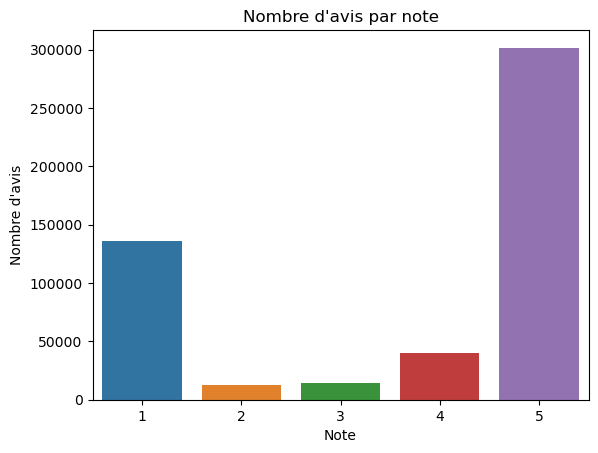

In [5]:
display(df.Note.value_counts())

# Affichage de la distribution des notes
sns.countplot(x=df['Note'])
plt.title("Nombre d'avis par note")
plt.ylabel("Nombre d'avis")
plt.show()

In [18]:
# Définir nuage des mots
from nltk.corpus import stopwords 

# Initialiser la variable des mots vides en français
Stop_words = set(stopwords.emojis('french'))

# Ajouter à la liste des stopwords des éléments de syntaxe qui ne servent pas à l'analyse du texte
new_stop_words = ["m'a","j'ai","a",",", ".", "``", "@", "*", "(", ")", "...", "!", "?", "-", "_", ">", "<", ":", "/", "=", "--", "©", "~", ";", "\\", "\\\\"]
Stop_words.update(new_stop_words)
print(Stop_words)

# Définir la fonction stop_words_filtering
def Stop_words_filtering(text):
    words = text.split()
    filtered_list = [mot for mot in words if mot not in Stop_words]
    return ' '.join(filtered_list)  # Rejoindre les mots filtrés en une seule chaîne de texte

    
# Appliquer la fonction de filtrage sur la colonne 'Contenu_avis'
df['Contenu_avis'] = df['Contenu_avis'].astype(str).apply(Stop_words_filtering)

# Afficher le DataFrame après filtrage
df.head()


{'(', 'été', 'avec', 'sommes', 'soyons', '@', 'eût', 'aie', 'votre', 'au', 'serait', 'ces', 'il', 'eut', 'ce', 'ait', 'ta', 'seront', 'aux', 'te', 'étantes', 'seriez', 'notre', 'à', 'lui', 'êtes', 'qui', 'eurent', 'auriez', 'l', 'fussent', 'eussent', 'avais', '--', 'j', 'ils', 'aient', 'dans', 'vous', 'ayante', 'sa', 'pour', 'un', '©', 'les', '...', '>', 'du', 'aurions', 'on', 'y', 'eûtes', 'fût', '.', 'aurons', 'mon', 'eux', 'ai', 'le', 't', 'ayons', "j'ai", 'd', 'auras', 'elle', 's', 'son', '_', 'es', 'c', 'eues', 'me', 'soyez', 'ne', 'aurez', 'ses', 'serai', 'étions', 'des', 'pas', 'serions', 'ayez', ':', 'fus', 'étés', 'fûtes', 'la', 'fusses', 'que', '!', '\\\\', 'eus', 'avions', 'soient', 'soit', '-', 'ayantes', '*', '=', 'étais', 'as', '/', 'avons', 'étants', 'je', 'm', 'eûmes', 'étant', 'mais', 'avez', 'et', 'étées', 'eusses', 'eusse', 'toi', 'moi', 'serez', 'fusse', 'serais', 'sois', 'a', 'aviez', '~', 'seras', "m'a", 'mes', 'eussiez', ')', 'étante', 'même', 'sur', 'suis', 'éta

,Nom_Entreprise,Nom_Client,Nombre_avis,Pays,Note,Date,Titre_avis,Contenu_avis,Réponse_Entrpris,year,month,weekday,weekend,day,hour,emojis,emojis_text,Langue,extracted_emojis
0,2atps,agathe,1,FR,5,2023-12-08 10:45:35+00:00,personnel réactif !!!,personnel réactif !!!! entreprise sérieuse res...,Non,2023,12,4,0,8,10,NaN,NaN,fr,NaN
1,2htransports,alexandre rif,2,FR,5,2024-04-08 01:40:55+00:00,j'ai demandé un transport pour aller de…,demandé transport aller paris lyon ça s'est bi...,Non,2024,4,0,0,8,1,NaN,NaN,fr,NaN
2,2htransports,game lu,1,FR,5,2024-03-09 22:26:36+00:00,j'ai trouvé cette société de…,trouvé cette société transporteur peu hasard s...,Non,2024,3,5,1,9,22,NaN,NaN,fr,NaN
3,2htransports,sayosurmc,1,FR,5,2023-02-16 23:30:42+00:00,si vous recherchez un service de…,si recherchez service coursier professionnel a...,Non,2023,2,3,0,16,23,NaN,NaN,fr,NaN
4,2htransports,s d,2,FR,1,2023-10-03 23:01:28+00:00,ce monsieur nous a flingué une mission…,monsieur flingué mission humanitaire maroc 24h...,"Bonjour MD,Je suis désolé d'entendre votre déc...",2023,10,1,0,3,23,NaN,NaN,fr,NaN


# Création d'un histogramme¶




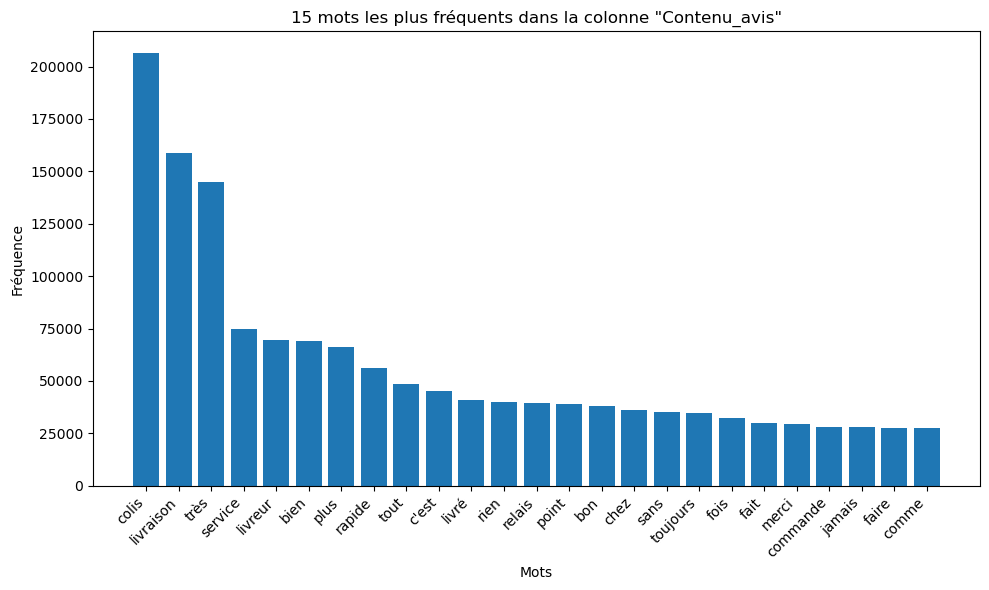

In [24]:
from collections import Counter

# Compter la fréquence de chaque mot dans la colonne 'Contenu_avis'
word_counts = Counter(' '.join(df['Contenu_avis']).split())

# Extraire les 25 mots les plus fréquents et leurs fréquences
top_words = word_counts.most_common(25)
top_words, frequencies = zip(*top_words)

# Créer le graphe
plt.figure(figsize=(10, 6))
plt.bar(top_words, frequencies)
plt.xlabel('Mots')
plt.ylabel('Fréquence')
plt.title('15 mots les plus fréquents dans la colonne "Contenu_avis"')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Afficher le graphe
plt.show()


# Fréquence des mots par note

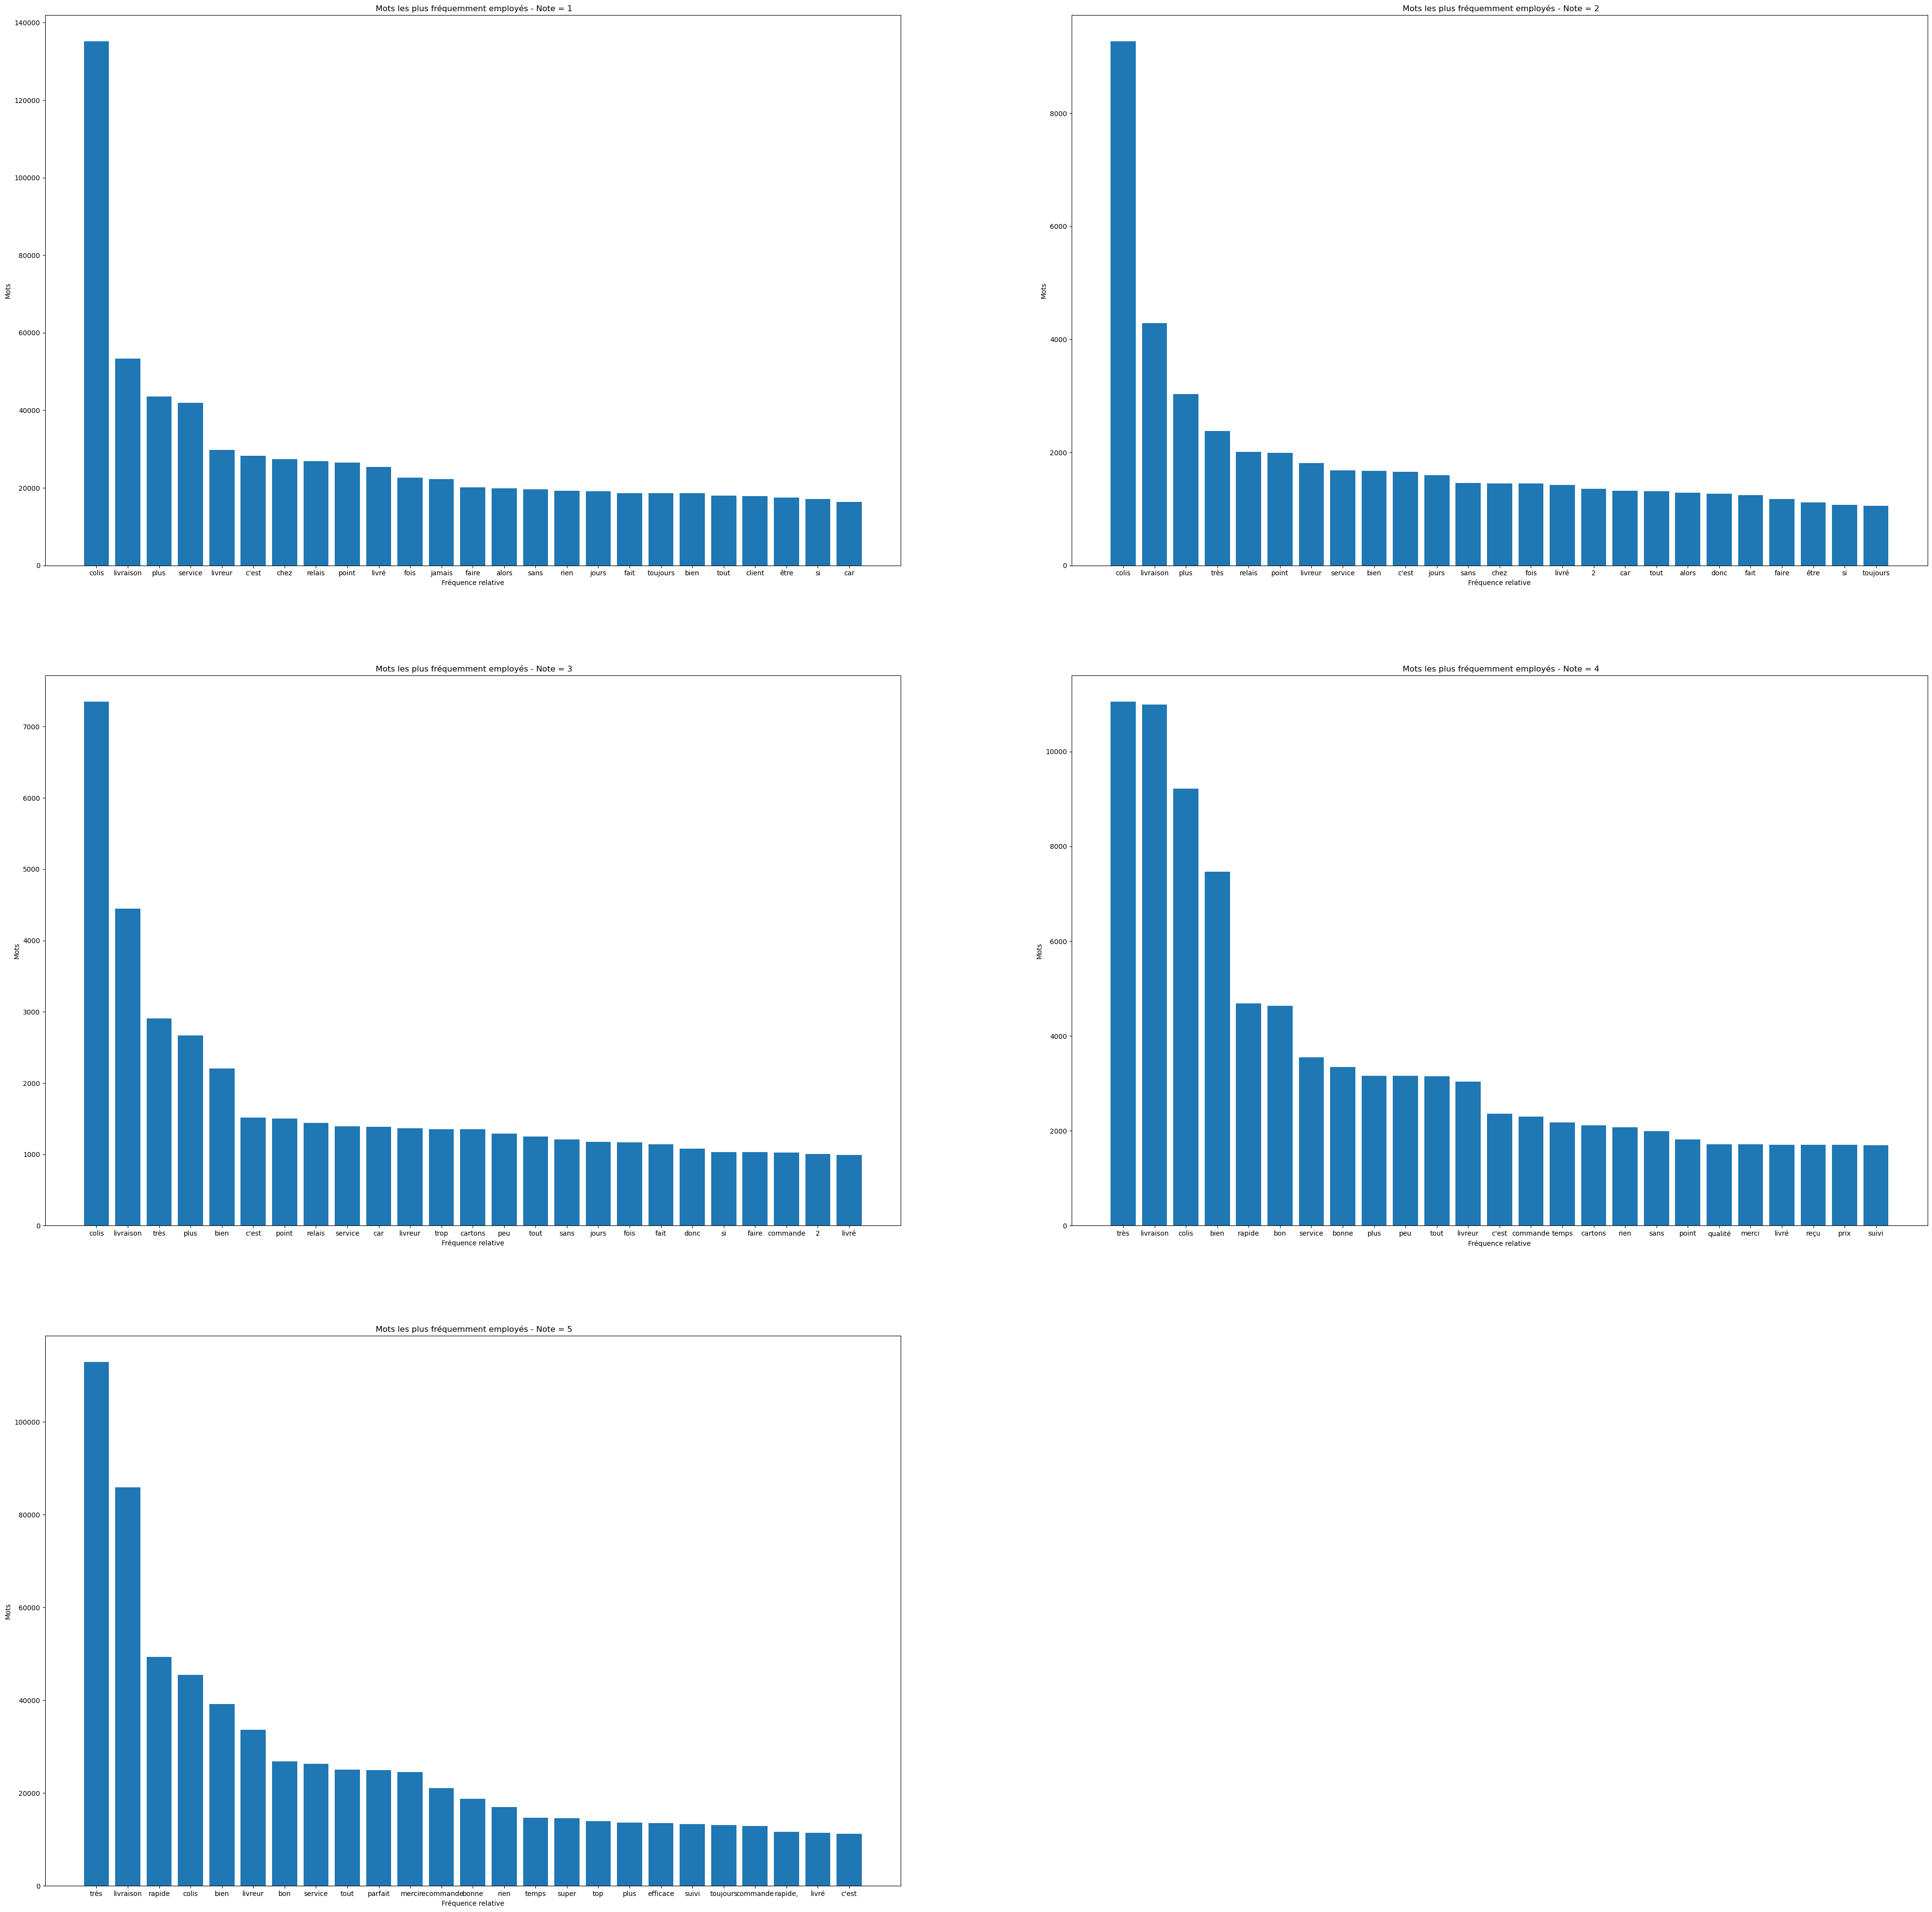

In [25]:
plt.figure(figsize=(50, 50))
plt.subplot(321)
word_counts_1 = Counter(' '.join(df.loc[df["Note"]==1 ,"Contenu_avis"]).split())
top_words_1 = word_counts_1.most_common(25)
top_words_1, frequencies_1 = zip(*top_words_1)

plt.bar(top_words_1, frequencies_1)
plt.title(' Mots les plus fréquemment employés - Note = 1')
plt.xlabel('Fréquence relative')
plt.ylabel('Mots')


plt.subplot(322)
word_counts_2 = Counter(' '.join(df.loc[df["Note"]==2 ,"Contenu_avis"]).split())
top_words_2 = word_counts_2.most_common(25)
top_words_2, frequencies_2 = zip(*top_words_2)

plt.bar(top_words_2, frequencies_2)
plt.title(' Mots les plus fréquemment employés - Note = 2')
plt.xlabel('Fréquence relative')
plt.ylabel('Mots')


plt.subplot(323)
word_counts_3 = Counter(' '.join(df.loc[df["Note"]==3 ,"Contenu_avis"]).split())
top_words_3 = word_counts_3.most_common(25)
top_words_3, frequencies_3 = zip(*top_words_3)

plt.bar(top_words_3, frequencies_3)
plt.title(' Mots les plus fréquemment employés - Note = 3')
plt.xlabel('Fréquence relative')
plt.ylabel('Mots')


plt.subplot(324)
word_counts_4 = Counter(' '.join(df.loc[df["Note"]==4 ,"Contenu_avis"]).split())
top_words_4 = word_counts_4.most_common(25)
top_words_4, frequencies_4 = zip(*top_words_4)

plt.bar(top_words_4, frequencies_4)
plt.title(' Mots les plus fréquemment employés - Note = 4')
plt.xlabel('Fréquence relative')
plt.ylabel('Mots')


plt.subplot(325)
word_counts_5 = Counter(' '.join(df.loc[df["Note"]==5 ,"Contenu_avis"]).split())
top_words_5 = word_counts_5.most_common(25)
top_words_5, frequencies_5 = zip(*top_words_5)

plt.bar(top_words_5, frequencies_5)
plt.title(' Mots les plus fréquemment employés - Note = 5')
plt.xlabel('Fréquence relative')
plt.ylabel('Mots')

plt.show();

### Indicateurs par note

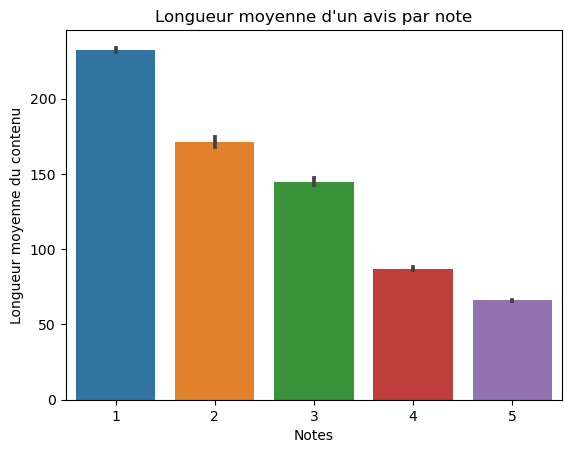

In [20]:
#Visualisation de la longueur par note
length = df["Contenu_avis"].apply(len)
sns.barplot(x = df["Note"], y = length, data=df)
plt.xlabel("Notes")
plt.ylabel("Longueur moyenne du contenu")
plt.title("Longueur moyenne d'un avis par note")
plt.show();

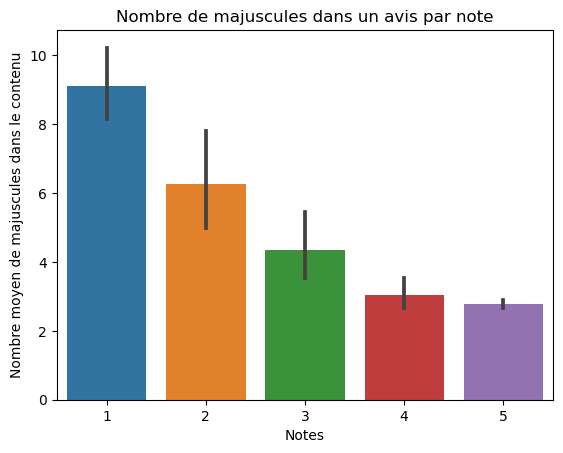

In [26]:
# Visualisation des majuscules par note
nb_maj = df["Contenu_avis"].apply(lambda x: sum(1 for c in x if c.isupper())) # Création d'une Series avec le nombre de majuscules

sns.barplot(x = df["Note"], y = nb_maj, data=df)
plt.xlabel("Notes")
plt.ylabel("Nombre moyen de majuscules dans le contenu")
plt.title("Nombre de majuscules dans un avis par note")
plt.show();

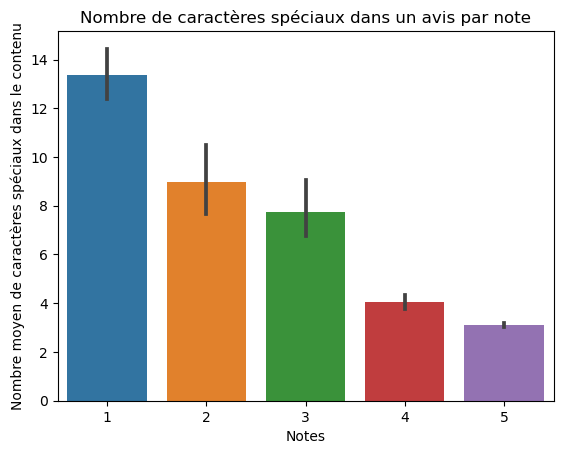

In [27]:
def count_special_chars(s):
    special_chars = "!\"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~" #Liste de tous les caractères spéciaux
    return sum(1 for c in s if c in special_chars)

sns.barplot(x = df["Note"], y = df["Contenu_avis"].apply(count_special_chars), data=df)
plt.xlabel("Notes")
plt.ylabel("Nombre moyen de caractères spéciaux dans le contenu")
plt.title("Nombre de caractères spéciaux dans un avis par note")
plt.show();

c:\Users\Florian\anaconda3\envs\SupplyChain\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\Florian\anaconda3\envs\SupplyChain\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\Florian\anaconda3\envs\SupplyChain\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\Florian\anaconda3\envs\SupplyChain\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and 

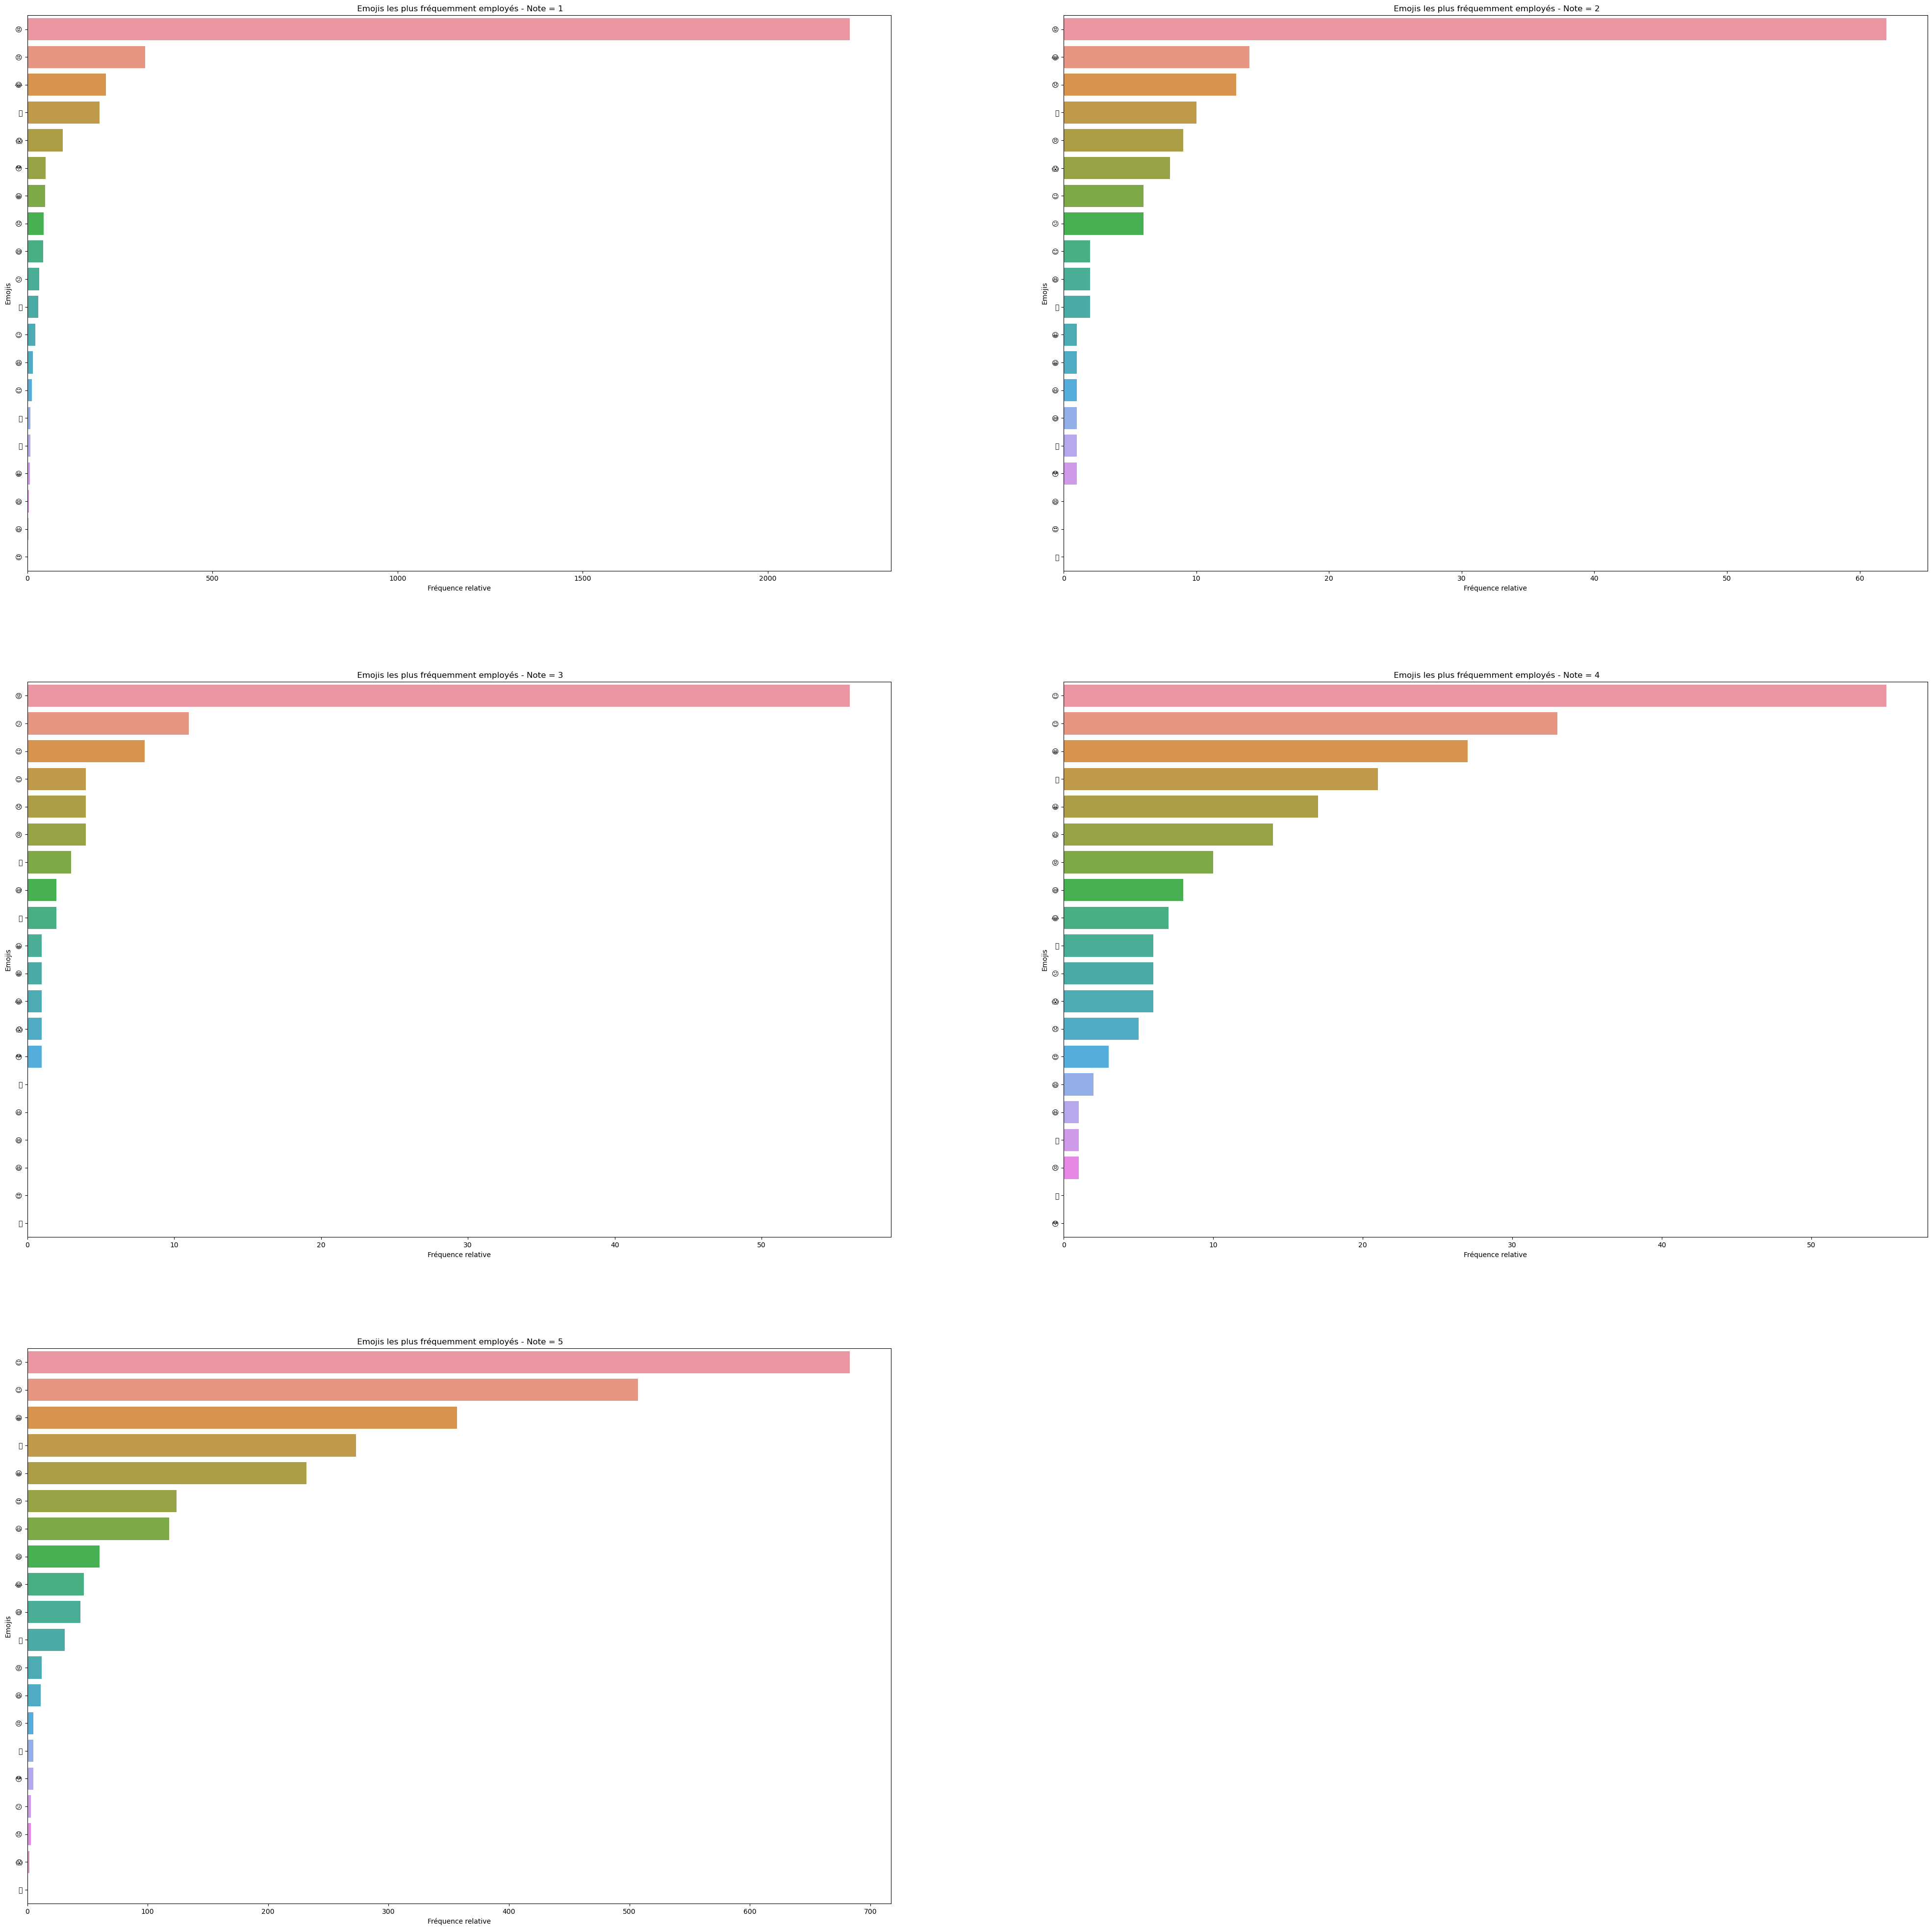

In [31]:
# Fonction compteur emojis
def count_emojis(col):
    # Création d'une liste d'émojis
    emo = ["😊","😉", "😀", "😁", "😂", "🤣", "😃", "😄", "😅", "😆", "😍", "🙂", "😕", "😞", "🙁", "😠", "😡", "😬", "😱", "😳"]
    freq_emoji = []

    for e in emo:
        som = 0
        for s in col:
            som += sum(1 for c in s if c == e)
        freq_emoji.append(som)
    
    # Tri des émojis et de leurs fréquences en fonction de la fréquence
    emo_freq_sorted = sorted(zip(emo, freq_emoji), key=lambda x: x[1], reverse=True)
    emo_sorted, freq_sorted = zip(*emo_freq_sorted)

    return (list(emo_sorted), list(freq_sorted))

plt.figure(figsize=(50, 50))
plt.subplot(321)
list_emo_1, freq_emo_1 = count_emojis(df.loc[df["Note"]==1 ,"Contenu_avis"])


sns.barplot(x=freq_emo_1, y=list_emo_1)
plt.title(' Emojis les plus fréquemment employés - Note = 1')
plt.xlabel('Fréquence relative')
plt.ylabel('Emojis')

plt.subplot(322)
list_emo_2, freq_emo_2 = count_emojis(df.loc[df["Note"]==2 ,"Contenu_avis"])

sns.barplot(x=freq_emo_2, y=list_emo_2)
plt.title(' Emojis les plus fréquemment employés - Note = 2')
plt.xlabel('Fréquence relative')
plt.ylabel('Emojis')

plt.subplot(323)
list_emo_3, freq_emo_3 = count_emojis(df.loc[df["Note"]==3 ,"Contenu_avis"])

sns.barplot(x=freq_emo_3, y=list_emo_3)
plt.title(' Emojis les plus fréquemment employés - Note = 3')
plt.xlabel('Fréquence relative')
plt.ylabel('Emojis')

plt.subplot(324)
list_emo_4, freq_emo_4 = count_emojis(df.loc[df["Note"]==4 ,"Contenu_avis"])

sns.barplot(x=freq_emo_4, y=list_emo_4)
plt.title(' Emojis les plus fréquemment employés - Note = 4')
plt.xlabel('Fréquence relative')
plt.ylabel('Emojis')

plt.subplot(325)
list_emo_5, freq_emo_5 = count_emojis(df.loc[df["Note"]==5 ,"Contenu_avis"])

sns.barplot(x=freq_emo_5, y=list_emo_5)
plt.title(' Emojis les plus fréquemment employés - Note = 5')
plt.xlabel('Fréquence relative')
plt.ylabel('Emojis')

plt.show();

### Indicateurs par titre

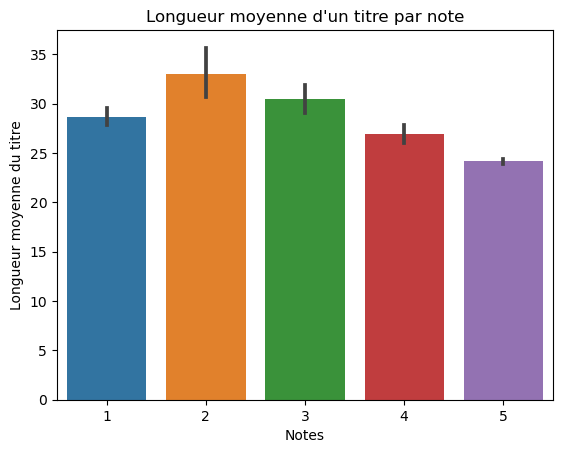

In [28]:
#Visualisation de la longueur du titre par note
length = df["Titre_avis"].apply(len)
sns.barplot(x = df["Note"], y = length, data=df)
plt.xlabel("Notes")
plt.ylabel("Longueur moyenne du titre")
plt.title("Longueur moyenne d'un titre par note")
plt.show();

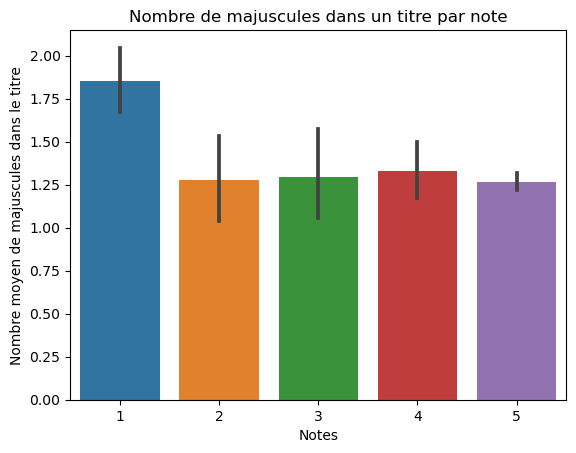

In [29]:
# Visualisation des majuscules d'un titre par note
nb_maj = df["Titre_avis"].apply(lambda x: sum(1 for c in x if c.isupper())) # Création d'une Series avec le nombre de majuscules

sns.barplot(x = df["Note"], y = nb_maj, data=df)
plt.xlabel("Notes")
plt.ylabel("Nombre moyen de majuscules dans le titre")
plt.title("Nombre de majuscules dans un titre par note")
plt.show();

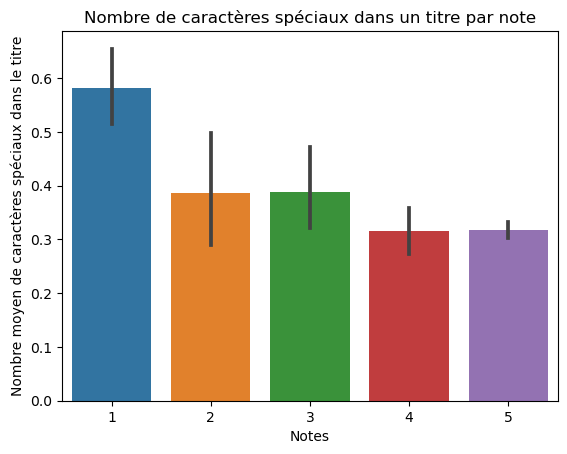

In [31]:
sns.barplot(x = df["Note"], y = df["Titre_avis"].apply(count_special_chars), data=df)
plt.xlabel("Notes")
plt.ylabel("Nombre moyen de caractères spéciaux dans le titre")
plt.title("Nombre de caractères spéciaux dans un titre par note")
plt.show();

c:\Users\Florian\anaconda3\envs\SupplyChain\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\Florian\anaconda3\envs\SupplyChain\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\Florian\anaconda3\envs\SupplyChain\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\Florian\anaconda3\envs\SupplyChain\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and 

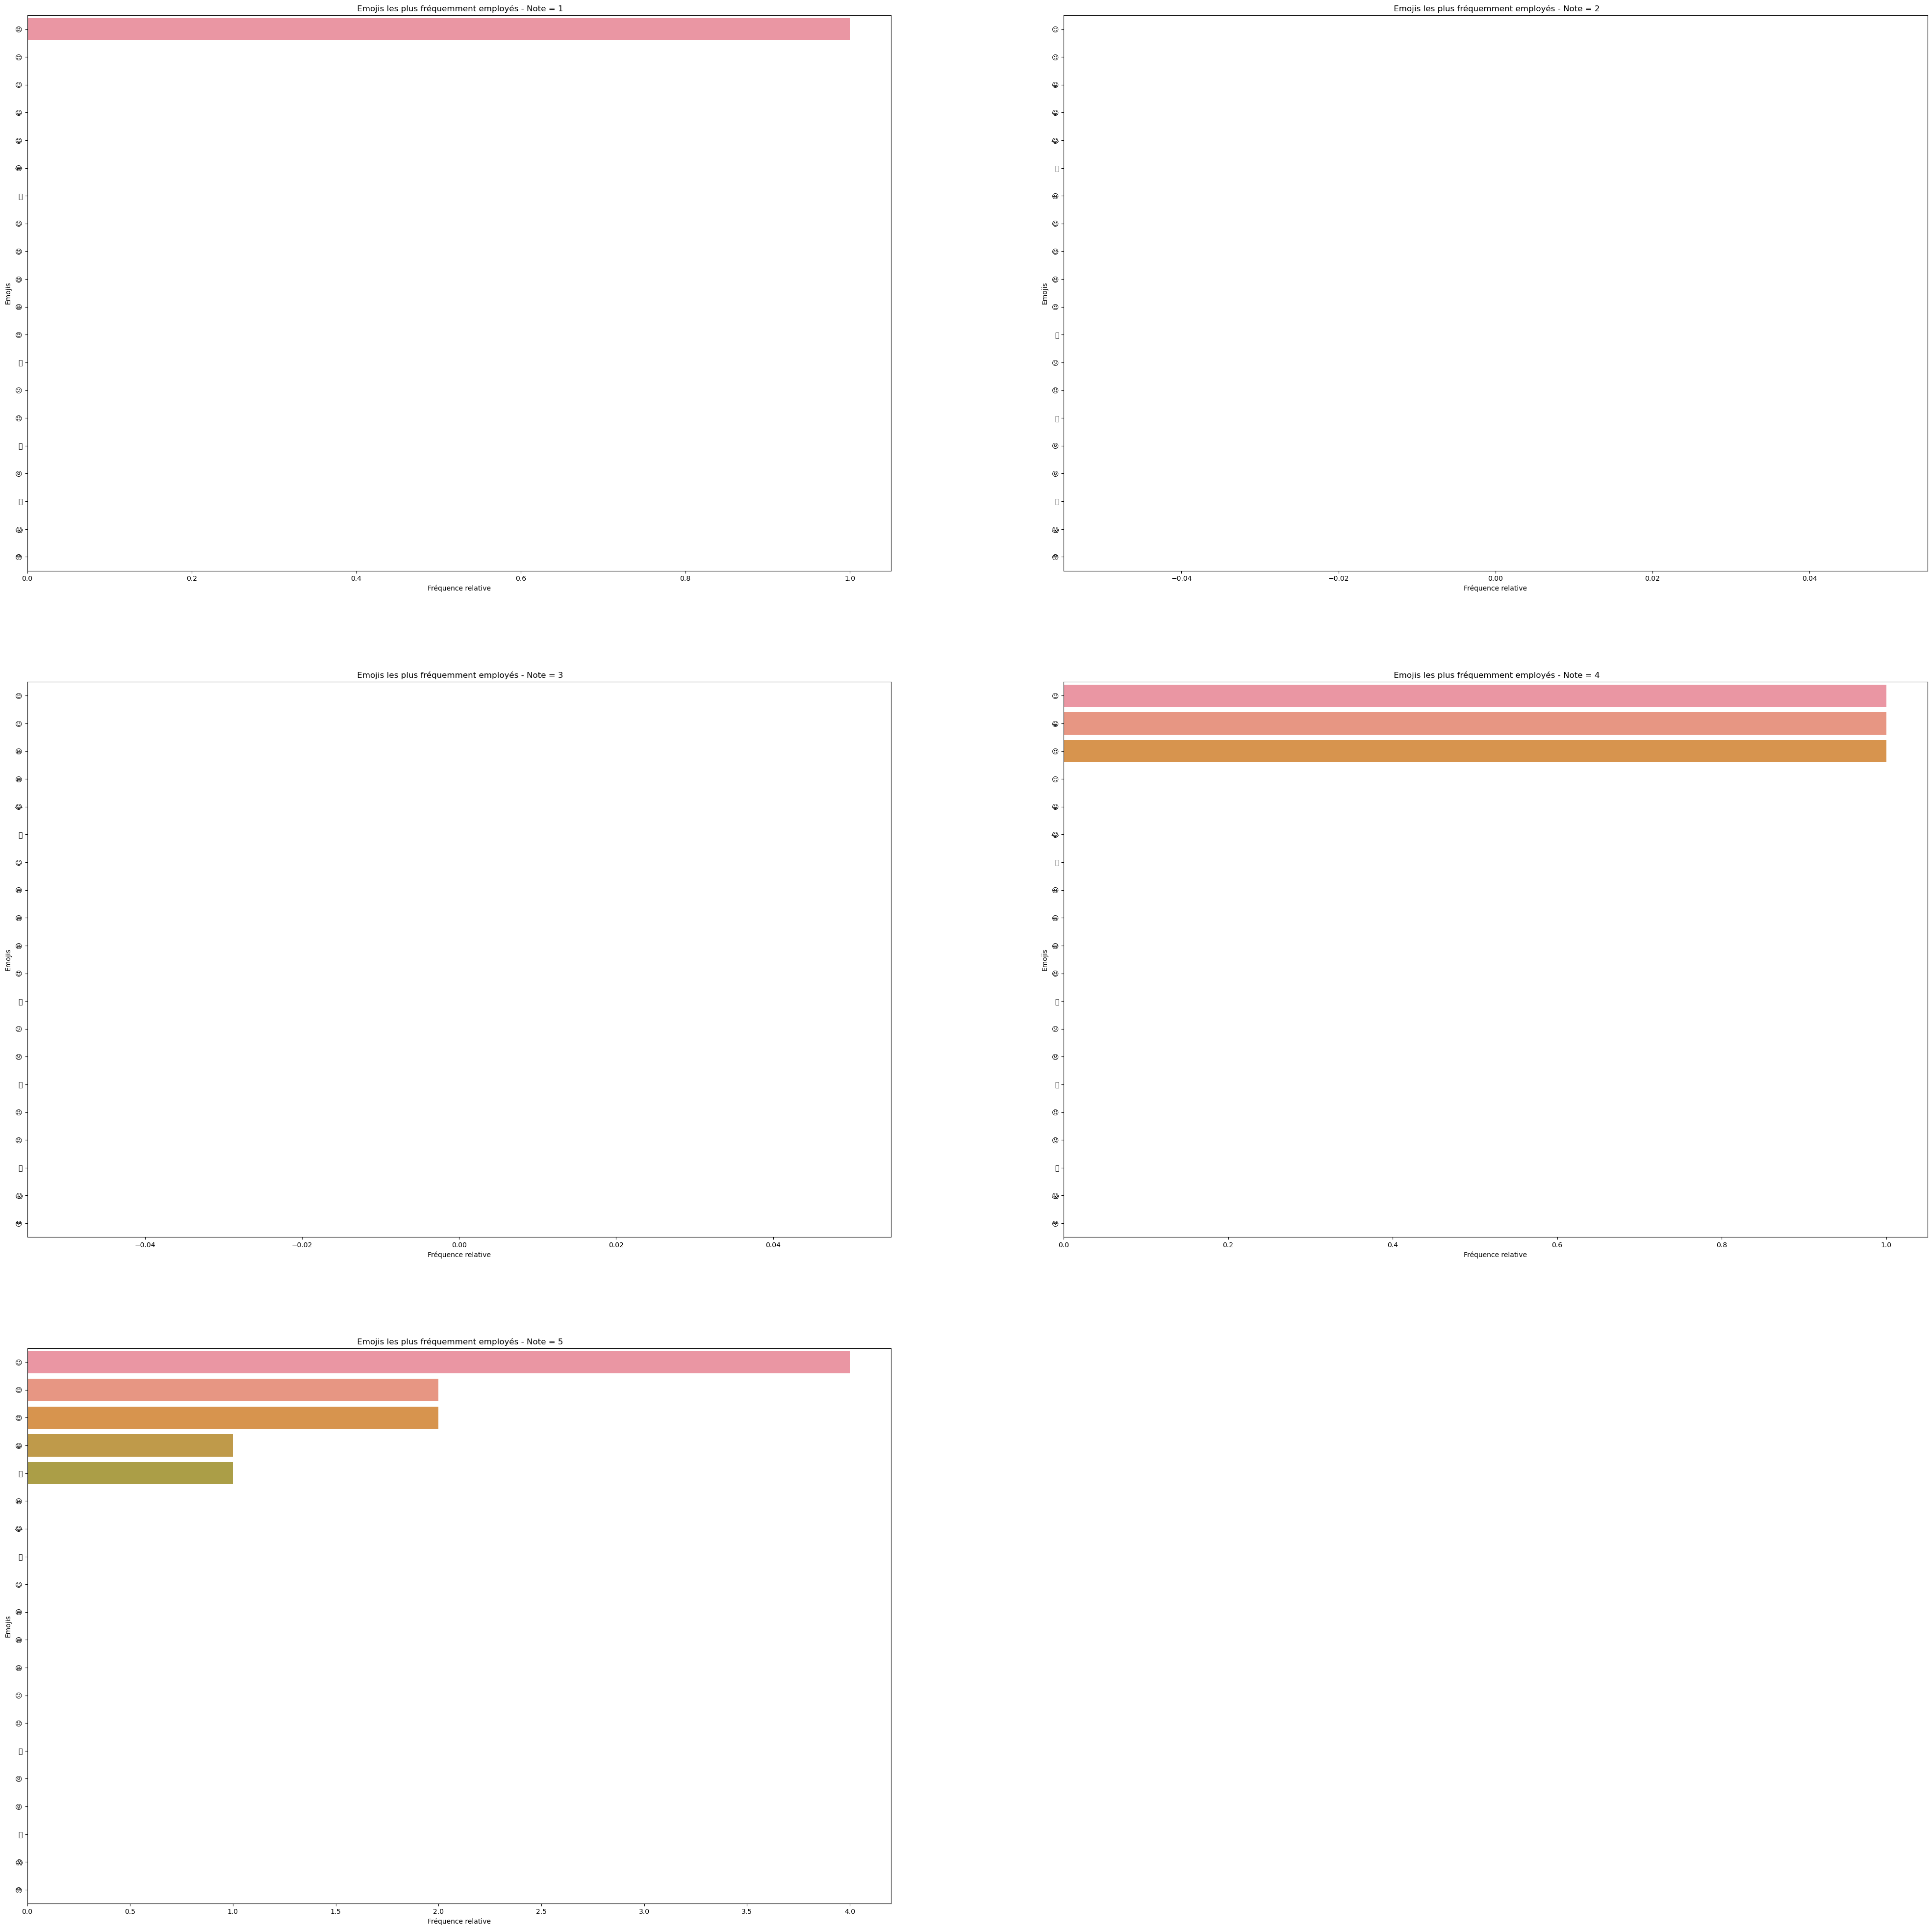

In [82]:
# Fonction compteur emojis
def count_emojis(col):
    # Création d'une liste d'émojis
    emo = ["😊","😉", "😀", "😁", "😂", "🤣", "😃", "😄", "😅", "😆", "😍", "🙂", "😕", "😞", "🙁", "😠", "😡", "😬", "😱", "😳"]
    freq_emoji = []

    for e in emo:
        som = 0
        for s in col:
            som += sum(1 for c in s if c == e)
        freq_emoji.append(som)
    
    # Tri des émojis et de leurs fréquences en fonction de la fréquence
    emo_freq_sorted = sorted(zip(emo, freq_emoji), key=lambda x: x[1], reverse=True)
    emo_sorted, freq_sorted = zip(*emo_freq_sorted)

    return (list(emo_sorted), list(freq_sorted))

plt.figure(figsize=(50, 50))
plt.subplot(321)
list_emo_1, freq_emo_1 = count_emojis(df.loc[df["Note"]==1 ,"Titre_avis"])


sns.barplot(x=freq_emo_1, y=list_emo_1)
plt.title(' Emojis les plus fréquemment employés - Note = 1')
plt.xlabel('Fréquence relative')
plt.ylabel('Emojis')

plt.subplot(322)
list_emo_2, freq_emo_2 = count_emojis(df.loc[df["Note"]==2 ,"Titre_avis"])

sns.barplot(x=freq_emo_2, y=list_emo_2)
plt.title(' Emojis les plus fréquemment employés - Note = 2')
plt.xlabel('Fréquence relative')
plt.ylabel('Emojis')

plt.subplot(323)
list_emo_3, freq_emo_3 = count_emojis(df.loc[df["Note"]==3 ,"Titre_avis"])

sns.barplot(x=freq_emo_3, y=list_emo_3)
plt.title(' Emojis les plus fréquemment employés - Note = 3')
plt.xlabel('Fréquence relative')
plt.ylabel('Emojis')

plt.subplot(324)
list_emo_4, freq_emo_4 = count_emojis(df.loc[df["Note"]==4 ,"Titre_avis"])

sns.barplot(x=freq_emo_4, y=list_emo_4)
plt.title(' Emojis les plus fréquemment employés - Note = 4')
plt.xlabel('Fréquence relative')
plt.ylabel('Emojis')

plt.subplot(325)
list_emo_5, freq_emo_5 = count_emojis(df.loc[df["Note"]==5 ,"Titre_avis"])

sns.barplot(x=freq_emo_5, y=list_emo_5)
plt.title(' Emojis les plus fréquemment employés - Note = 5')
plt.xlabel('Fréquence relative')
plt.ylabel('Emojis')

plt.show();

### Indicateurs par réponse

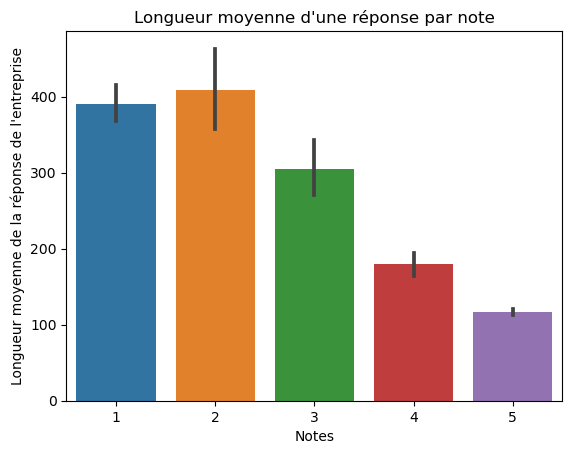

In [32]:
#Visualisation de la longueur de la réponse par note
length = df["Réponse_Entrpris"].apply(len)
sns.barplot(x = df["Note"], y = length, data=df)
plt.xlabel("Notes")
plt.ylabel("Longueur moyenne de la réponse de l'entreprise")
plt.title("Longueur moyenne d'une réponse par note")
plt.show();

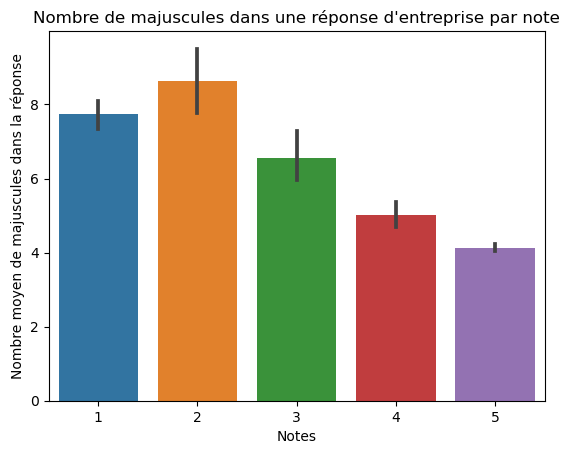

In [33]:
# Visualisation des majuscules d'une réponse par note
nb_maj = df["Réponse_Entrpris"].apply(lambda x: sum(1 for c in x if c.isupper())) # Création d'une Series avec le nombre de majuscules

sns.barplot(x = df["Note"], y = nb_maj, data=df)
plt.xlabel("Notes")
plt.ylabel("Nombre moyen de majuscules dans la réponse")
plt.title("Nombre de majuscules dans une réponse d'entreprise par note")
plt.show();

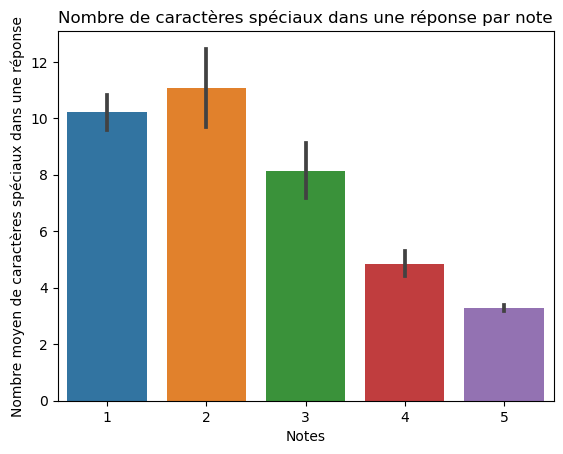

In [34]:
sns.barplot(x = df["Note"], y = df["Réponse_Entrpris"].apply(count_special_chars), data=df)
plt.xlabel("Notes")
plt.ylabel("Nombre moyen de caractères spéciaux dans une réponse")
plt.title("Nombre de caractères spéciaux dans une réponse par note")
plt.show();

c:\Users\Florian\anaconda3\envs\SupplyChain\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\Florian\anaconda3\envs\SupplyChain\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\Florian\anaconda3\envs\SupplyChain\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\Florian\anaconda3\envs\SupplyChain\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and 

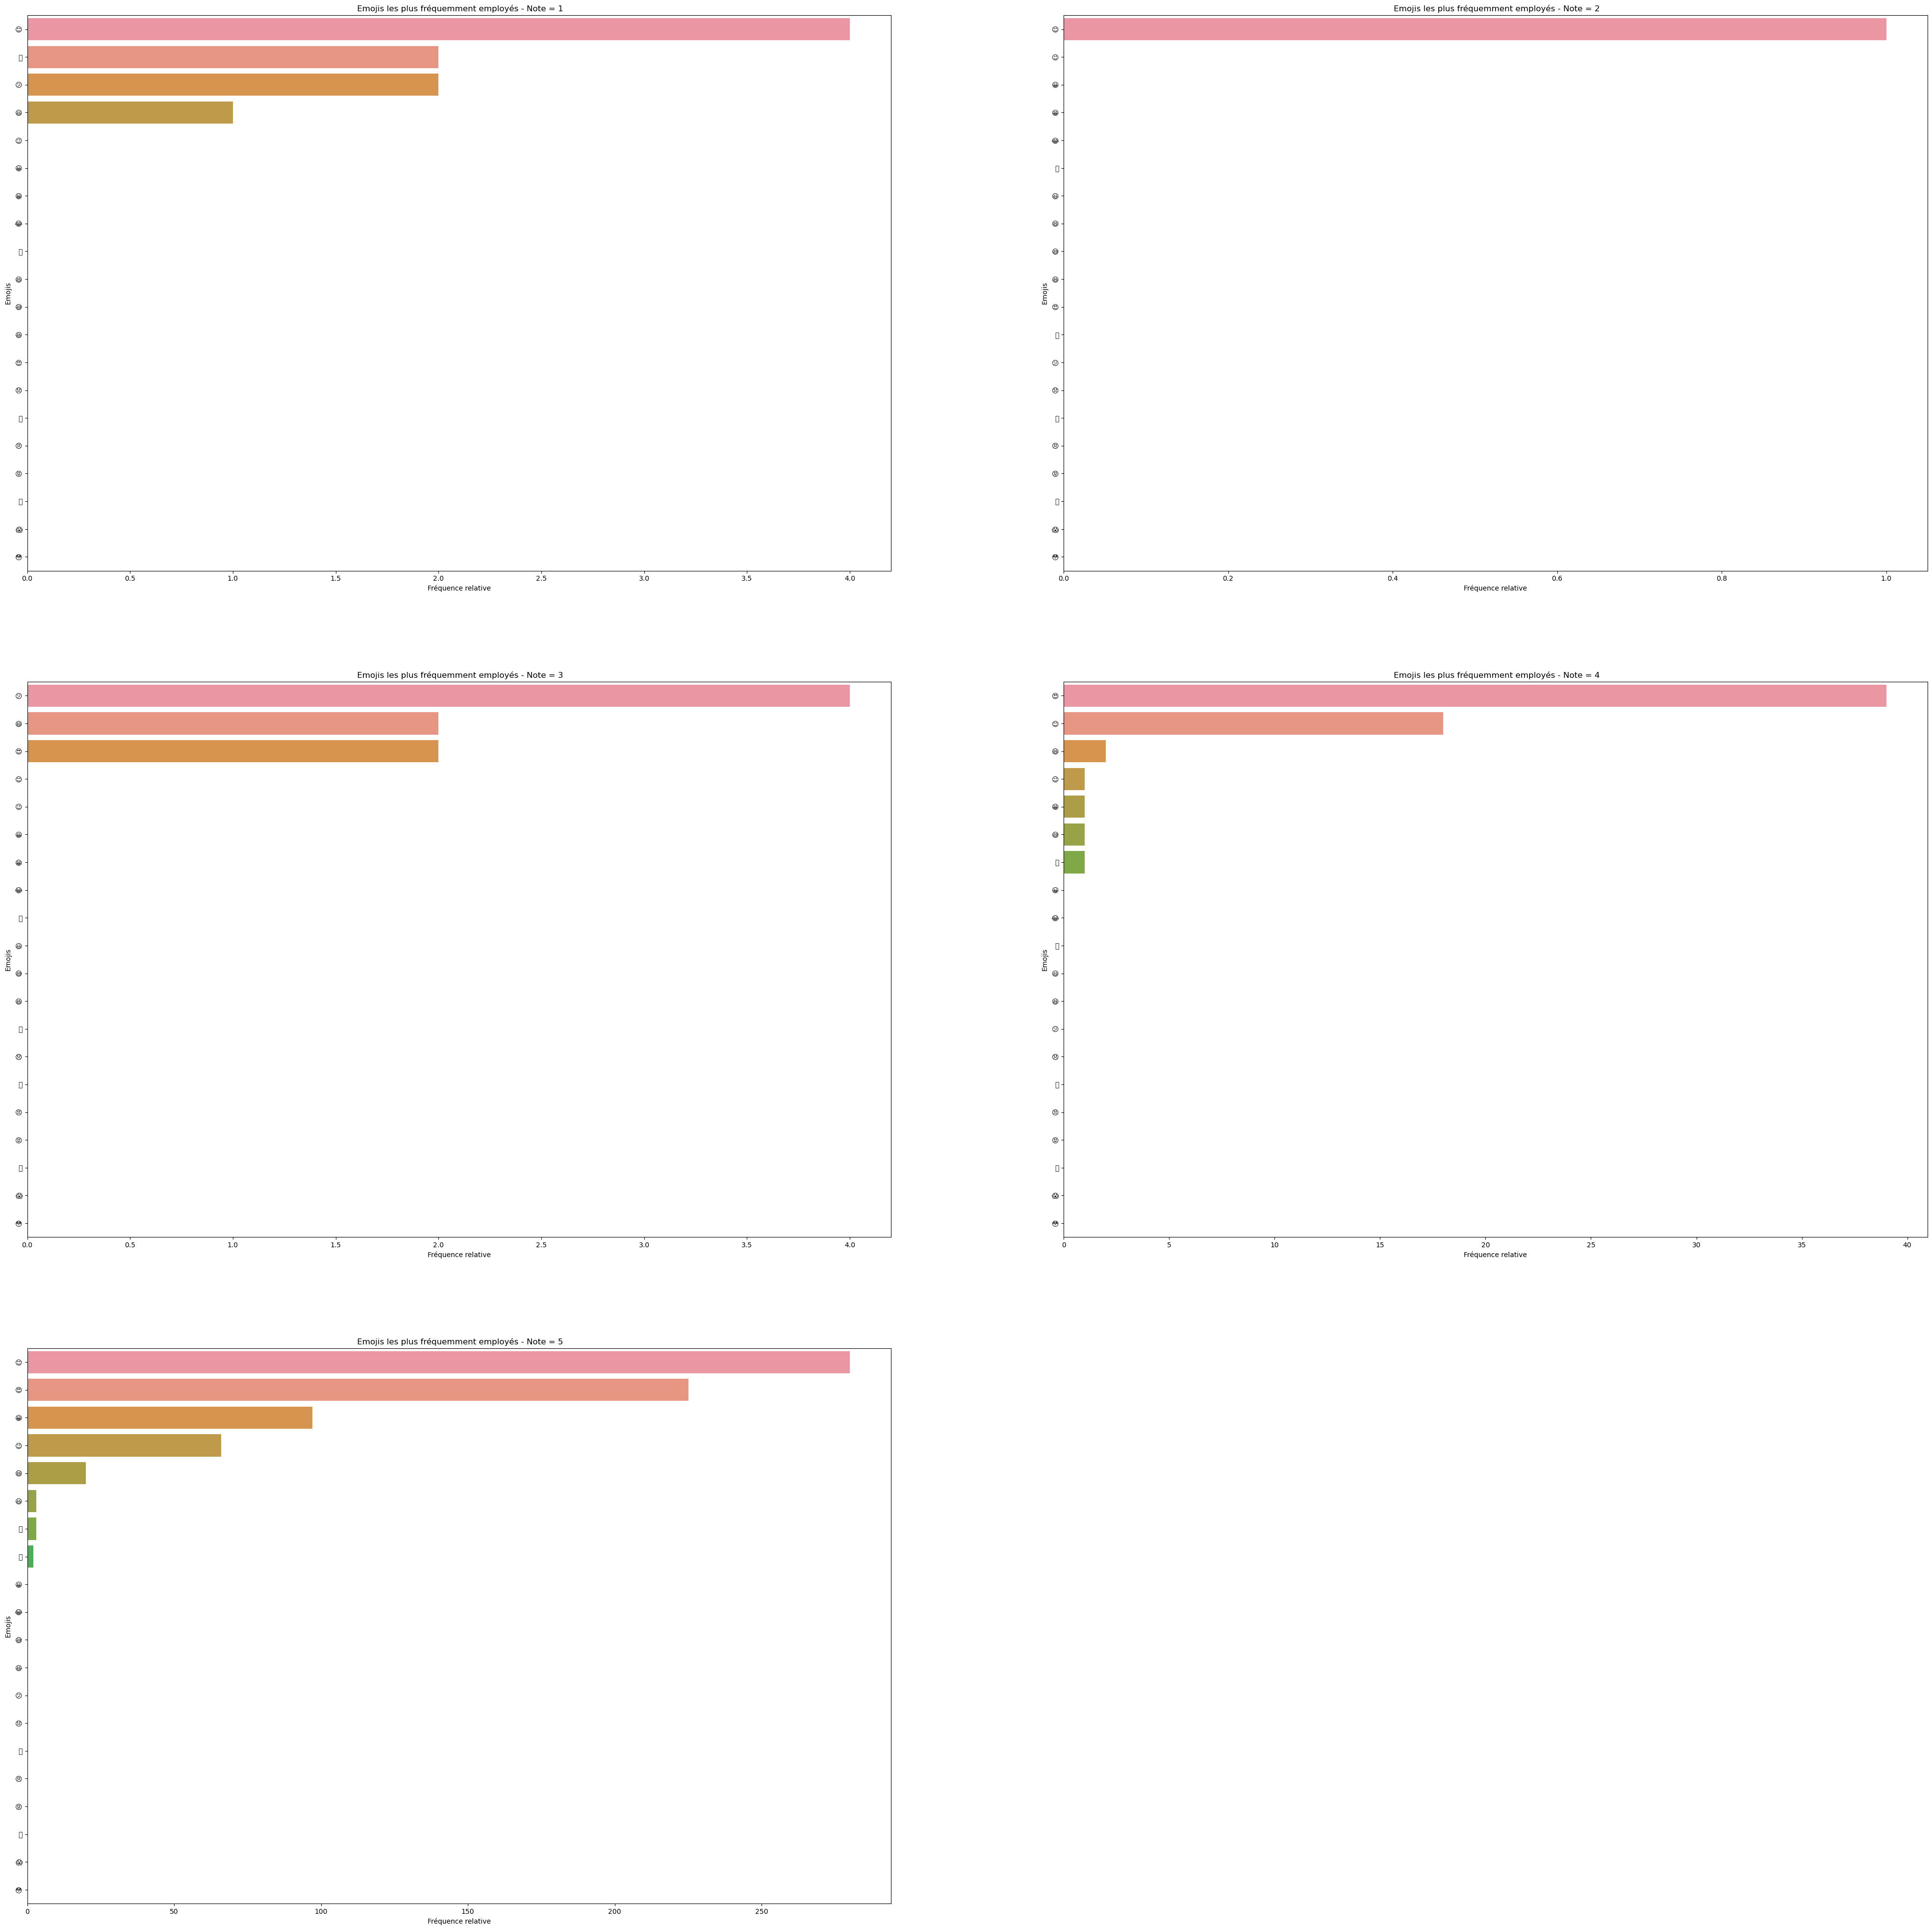

In [81]:
# Fonction compteur emojis
def count_emojis(col):
    # Création d'une liste d'émojis
    emo = ["😊","😉", "😀", "😁", "😂", "🤣", "😃", "😄", "😅", "😆", "😍", "🙂", "😕", "😞", "🙁", "😠", "😡", "😬", "😱", "😳"]
    freq_emoji = []

    for e in emo:
        som = 0
        for s in col:
            som += sum(1 for c in s if c == e)
        freq_emoji.append(som)
    
    # Tri des émojis et de leurs fréquences en fonction de la fréquence
    emo_freq_sorted = sorted(zip(emo, freq_emoji), key=lambda x: x[1], reverse=True)
    emo_sorted, freq_sorted = zip(*emo_freq_sorted)

    return (list(emo_sorted), list(freq_sorted))

plt.figure(figsize=(50, 50))
plt.subplot(321)
list_emo_1, freq_emo_1 = count_emojis(df.loc[df["Note"]==1 ,"Réponse_Entrpris"])


sns.barplot(x=freq_emo_1, y=list_emo_1)
plt.title(' Emojis les plus fréquemment employés - Note = 1')
plt.xlabel('Fréquence relative')
plt.ylabel('Emojis')

plt.subplot(322)
list_emo_2, freq_emo_2 = count_emojis(df.loc[df["Note"]==2 ,"Réponse_Entrpris"])

sns.barplot(x=freq_emo_2, y=list_emo_2)
plt.title(' Emojis les plus fréquemment employés - Note = 2')
plt.xlabel('Fréquence relative')
plt.ylabel('Emojis')

plt.subplot(323)
list_emo_3, freq_emo_3 = count_emojis(df.loc[df["Note"]==3 ,"Réponse_Entrpris"])

sns.barplot(x=freq_emo_3, y=list_emo_3)
plt.title(' Emojis les plus fréquemment employés - Note = 3')
plt.xlabel('Fréquence relative')
plt.ylabel('Emojis')

plt.subplot(324)
list_emo_4, freq_emo_4 = count_emojis(df.loc[df["Note"]==4 ,"Réponse_Entrpris"])

sns.barplot(x=freq_emo_4, y=list_emo_4)
plt.title(' Emojis les plus fréquemment employés - Note = 4')
plt.xlabel('Fréquence relative')
plt.ylabel('Emojis')

plt.subplot(325)
list_emo_5, freq_emo_5 = count_emojis(df.loc[df["Note"]==5 ,"Réponse_Entrpris"])

sns.barplot(x=freq_emo_5, y=list_emo_5)
plt.title(' Emojis les plus fréquemment employés - Note = 5')
plt.xlabel('Fréquence relative')
plt.ylabel('Emojis')

plt.show();